# Feature Engineering

In this lesson we discuss some methods for *automated* feature engineering, specifically feature selection.

While these methods can produce useful results, they are but a single piece of of the feature engineering puzzle.

## Setup

In [37]:
import pandas as pd
import numpy as np
import pydataset
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

tips = pydataset.data('tips')
tips['smoker'] = (tips.smoker == 'Yes').astype(int)
tips['dinner'] = (tips.time == 'Dinner').astype(int)

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,dinner
1,16.99,1.01,Female,0,Sun,Dinner,2,1
2,10.34,1.66,Male,0,Sun,Dinner,3,1
3,21.01,3.50,Male,0,Sun,Dinner,3,1
4,23.68,3.31,Male,0,Sun,Dinner,2,1
5,24.59,3.61,Female,0,Sun,Dinner,4,1


In [3]:
X = tips[['total_bill', 'size', 'smoker', 'dinner']]
y = tips.tip

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
X_train_scaled

array([[ 2.22751067,  1.51285289, -0.79915922,  0.59511904],
       [-0.4404687 , -0.57939047,  1.2513151 ,  0.59511904],
       [-0.76989051, -0.57939047,  1.2513151 ,  0.59511904],
       [-1.04984283, -0.57939047, -0.79915922,  0.59511904],
       [-1.04197269, -0.57939047,  1.2513151 , -1.6803361 ],
       [ 0.02274559, -0.57939047,  1.2513151 , -1.6803361 ],
       [-0.70130781, -0.57939047, -0.79915922,  0.59511904],
       [ 1.75979916,  1.51285289, -0.79915922,  0.59511904],
       [ 1.71145398,  1.51285289, -0.79915922, -1.6803361 ],
       [-1.07008035, -0.57939047,  1.2513151 , -1.6803361 ],
       [ 0.41850148, -0.57939047,  1.2513151 ,  0.59511904],
       [-0.89918576, -0.57939047, -0.79915922,  0.59511904],
       [ 0.66922183,  1.51285289, -0.79915922,  0.59511904],
       [ 0.21275339,  1.51285289, -0.79915922,  0.59511904],
       [ 1.65186573,  3.60509626, -0.79915922, -1.6803361 ],
       [ 0.81538168, -0.57939047,  1.2513151 ,  0.59511904],
       [ 0.83674351,  3.

## Select K Best

- uses an f regression test
- looks at each feature in isolation
- is a model with that feature better than no model at all

In [5]:
kbest = SelectKBest(f_regression, k=3)
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=3, score_func=<function f_regression at 0x7fcfae416b80>)

In [6]:
# returns array where number of elements = number of columns in X - var
# booleans indicate which features were selected 
kbest.get_support()

array([ True,  True, False,  True])

In [7]:
kbest.scores_

array([1.72913650e+02, 6.52747700e+01, 1.53678003e-04, 1.66952954e+00])

In [8]:
kbest.pvalues_

array([1.28577891e-28, 6.93874955e-14, 9.90121928e-01, 1.97866553e-01])

In [9]:
X_train.columns[kbest.get_support()]

Index(['total_bill', 'size', 'dinner'], dtype='object')

In [10]:
X_train[X_train.columns[kbest.get_support()]]

,total_bill,size,dinner
24,39.42,4,1
191,15.69,2,1
210,12.76,2,1
11,10.27,2,1
197,10.34,2,0
...,...,...,...
99,21.01,2,1
221,12.16,2,0
67,16.45,2,1
127,8.52,2,0


In [11]:
# drops columns not chosen by kbest
X_kbest = kbest.transform(X_train_scaled)
X_kbest.shape

(195, 3)

In [12]:
X_kbest[:5]

array([[ 2.22751067,  1.51285289,  0.59511904],
       [-0.4404687 , -0.57939047,  0.59511904],
       [-0.76989051, -0.57939047,  0.59511904],
       [-1.04984283, -0.57939047,  0.59511904],
       [-1.04197269, -0.57939047, -1.6803361 ]])

<div style="border: 1px solid black; border-radius: 3px; background: palegreen; padding: .5em 1em;">
    <p style="font-size: 1.3em; font-weight: bold">Mini Exercise</p>
    <ol>
        <li>Use <code>pydataset</code> to load the <code>swiss</code> dataset.</li>
        <li>Split the swiss dataset into X and y, and train and test. The goal is to predict <code>Fertility</code>.</li>
        <li>Use <code>SelectKBest</code> to find the top 3 features that predict fertility in the swiss data set.</li>
    </ol>
</div>

In [13]:
swiss = pydataset.data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [31]:
X = swiss[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']]
y = swiss['Fertility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit
kbest = SelectKBest(f_regression, k=3)
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=3, score_func=<function f_regression at 0x7fcfae416b80>)

In [32]:
X_train.columns[kbest.get_support()]

Index(['Examination', 'Education', 'Catholic'], dtype='object')

In [33]:
X_kbest = kbest.transform(X_train_scaled)
X_kbest.shape

(37, 3)

In [34]:
X_train[X_train.columns[kbest.get_support()]].sample(5)

,Examination,Education,Catholic
Rolle,16,10,7.72
Grandson,17,8,3.30
Vevey,25,19,18.46
Aubonne,14,7,2.27
Moudon,14,3,4.52


Agriculture 0: 2.383293
Examination 1: 14.806314
Education 2: 15.085392
Catholic 3: 9.737175
Infant.Mortality 4: 3.215111


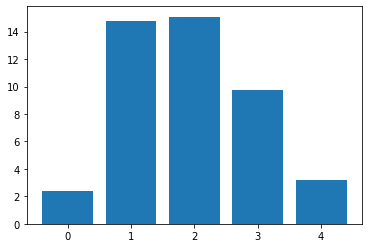

In [41]:
# Courtesy of Brandon Sharpe
for i in range(len(kbest.scores_)):
    print(f'{X_train.columns[i]} %d: %f' % (i, kbest.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(kbest.scores_))], kbest.scores_)
plt.show()

## Recursive Feature Elimination

- Fits a model and eliminates the worst performing features
- More computationally expensive
- Looks at all the features together
    - Drops lowest feature
    - Repeat...
- **Only works for models that have feature importance concept within model** (Won't work with KNN)
- Should be done on scaled data

In [53]:
X = tips[['total_bill', 'size', 'smoker', 'dinner']]
y = tips.tip

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_train_scaled, y_train)
rfe.get_support()

array([ True,  True,  True, False])

In [62]:
X_train.columns[rfe.get_support()]

Index(['total_bill', 'size', 'smoker'], dtype='object')

In [63]:
pd.Series(rfe.ranking_, index=X_train.columns)

total_bill    1
size          1
smoker        1
dinner        2
dtype: int64

<div style="border: 1px solid black; border-radius: 3px; background: palegreen; padding: .5em 1em;">
    <p style="font-size: 1.3em; font-weight: bold">Mini Exercise</p>
    <ol>
        <li>Use <code>RFE</code> and <code>LinearRegression</code> to find the top 3 features that predict fertility in the swiss data set.</li>
        <li>Are the results different than what select k best gave you?</li>
    </ol>
</div>

In [69]:
X = swiss[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']]
y = swiss['Fertility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_train_scaled, y_train)
X_train.columns[rfe.get_support()]

Index(['Agriculture', 'Education', 'Catholic'], dtype='object')

In [67]:
pd.Series(rfe.ranking_, index=X_train.columns)

Agriculture         1
Examination         3
Education           1
Catholic            1
Infant.Mortality    2
dtype: int64